**Importing Libraries**

To begin the task, the following Python libraries were imported:

**Pandas:** For data loading, cleaning, manipulation, and preprocessing.

**Seaborn & Matplotlib:** For visualization of data distributions, correlations, and outlier detection.

**Scikit-learn (train_test_split):** To split the dataset into training and testing sets for fair model evaluation.

**Scikit-learn (StandardScaler):** For feature scaling, ensuring numerical variables are standardized with mean = 0 and variance = 1, which improves model efficiency.

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**Loading Datasets**

The training and testing datasets were loaded using Pandas read_csv() function.

**train.csv →** Used for model training and preprocessing tasks.

**test.csv →** Used for model evaluation to check the generalization of the trained model.

In [127]:
# 1. Load datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")


The command **train_df.head()** and **test_df.head()** displays the first five rows of the training dataset.

It helps to quickly inspect the structure of the data.

Provides an overview of columns, data types, and sample values before preprocessing.

In [128]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The next steps involves checking for missing values and duplicate records in both training and testing datasets.
Visualizations are applied to highlight the distribution of missing values and to identify potential data quality issues.

In [130]:
print("Missing values count:\n", train_df.isnull().sum())

Missing values count:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [131]:
print("Missing values count:\n", test_df.isnull().sum())

Missing values count:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [132]:
train_df.duplicated().sum()

np.int64(0)

In [133]:
test_df.duplicated().sum()

np.int64(0)

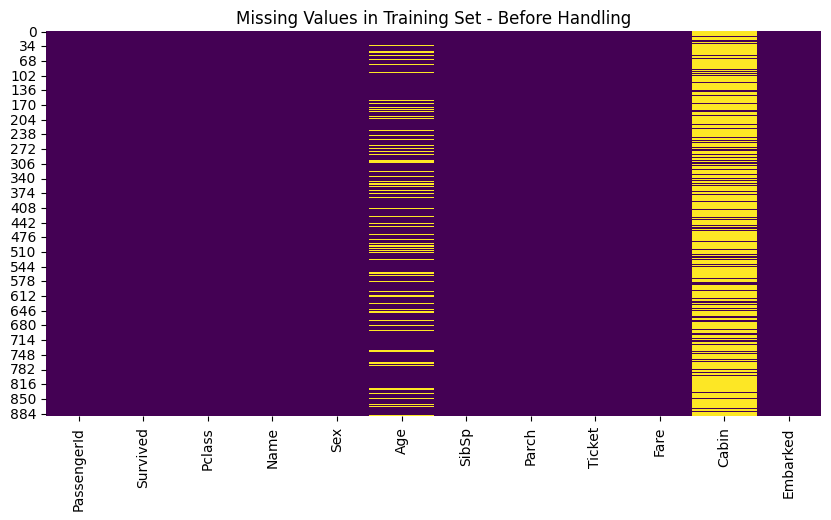

In [134]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Set - Before Handling")
plt.show()

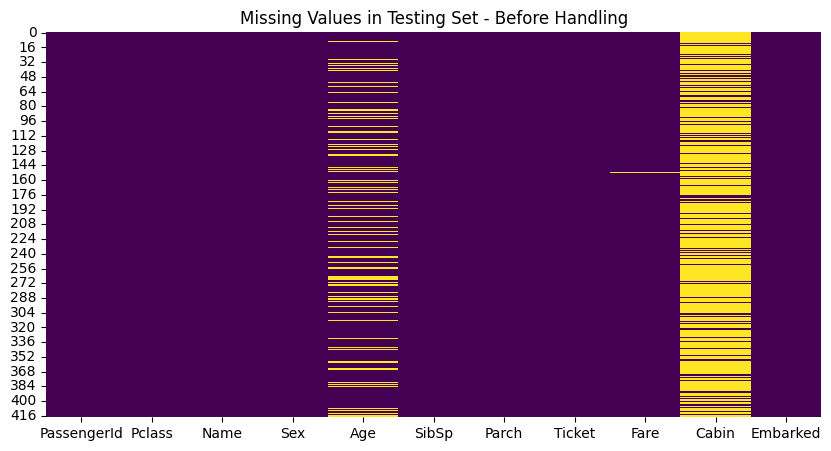

In [106]:
plt.figure(figsize=(10,5))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Testing Set - Before Handling")
plt.show()

Handling of missing values is performed by imputing the median for the missing values in the Age column and Fare column, dropping the Cabin column due to high missing ratio, and filling the missing values in the Embarked column with the mode in the training dataset.

In [135]:
train_df.fillna({'Age': train_df['Age'].median()}, inplace=True)
test_df.fillna({'Age': test_df['Age'].median()}, inplace=True)


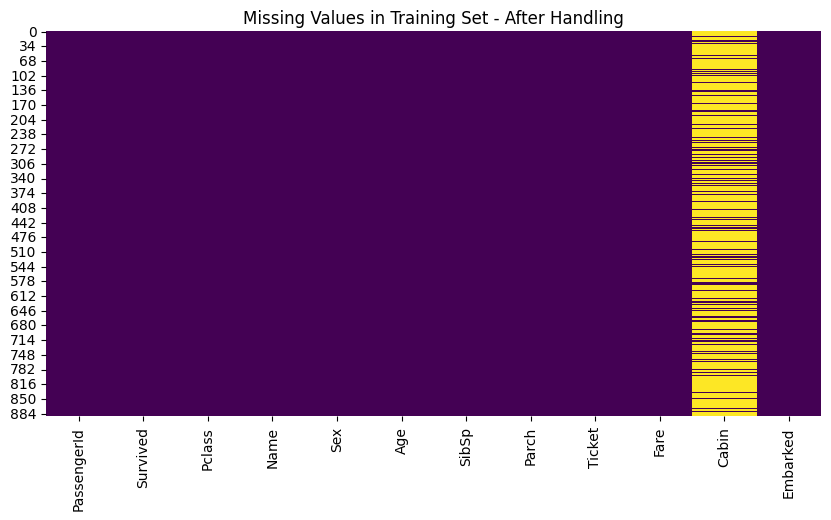

In [136]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Set - After Handling")
plt.show()

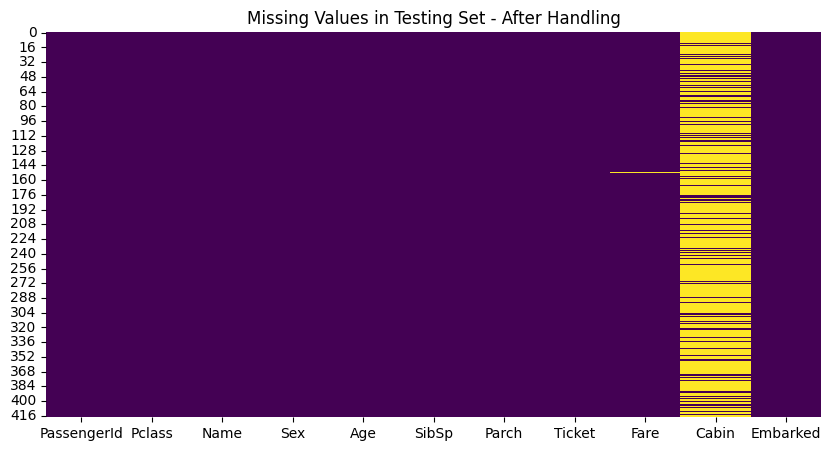

In [137]:
plt.figure(figsize=(10,5))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Testing Set - After Handling")
plt.show()

In [138]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


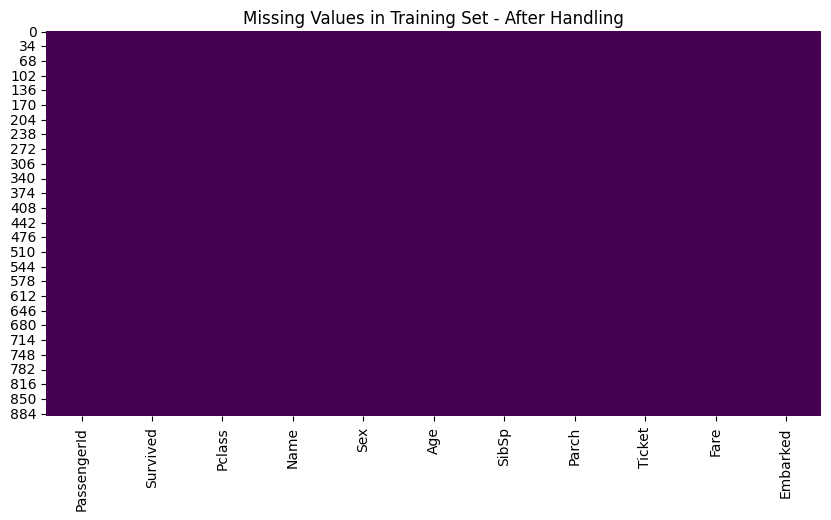

In [139]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Set - After Handling")
plt.show()

In [140]:
print("Missing values count:\n", train_df.isnull().sum())

Missing values count:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [141]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


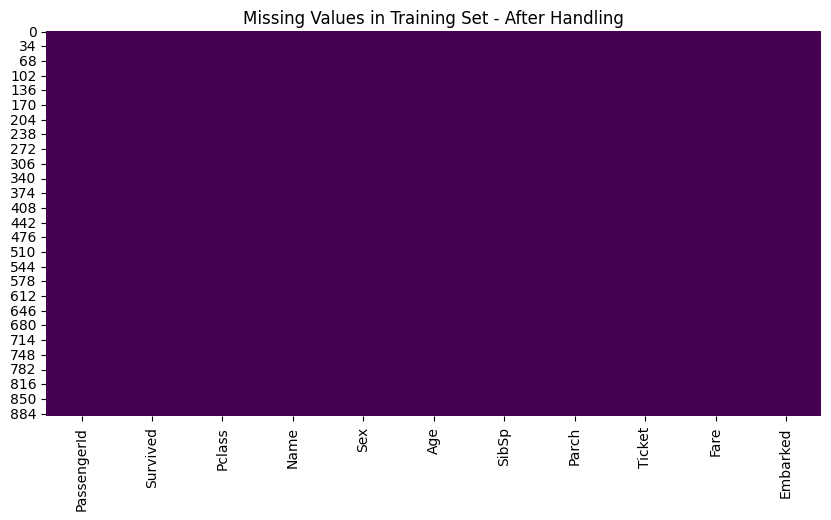

In [142]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Training Set - After Handling")
plt.show()

In [143]:
print("Missing values count:\n", train_df.isnull().sum())

Missing values count:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


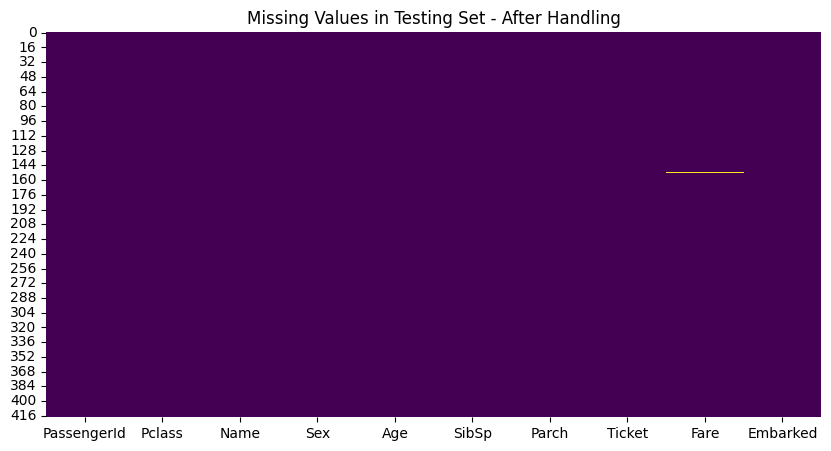

In [144]:
plt.figure(figsize=(10,5))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Testing Set - After Handling")
plt.show()

In [145]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())


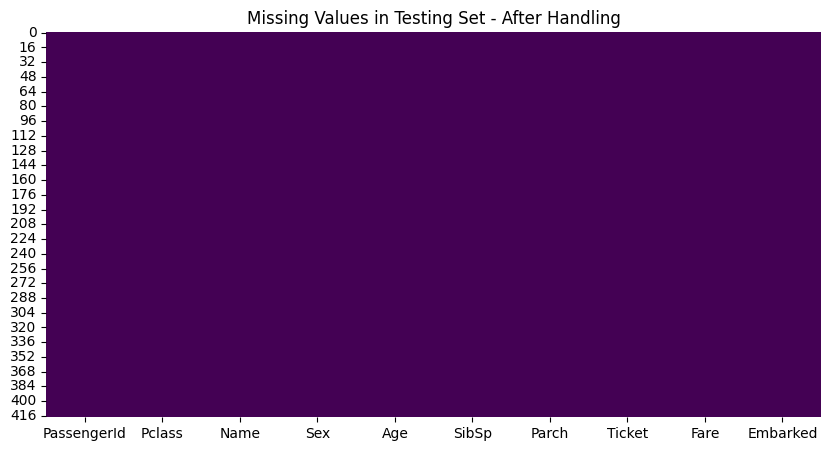

In [146]:
plt.figure(figsize=(10,5))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Testing Set - After Handling")
plt.show()

In [147]:
print("Missing values count:\n", test_df.isnull().sum())

Missing values count:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [148]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


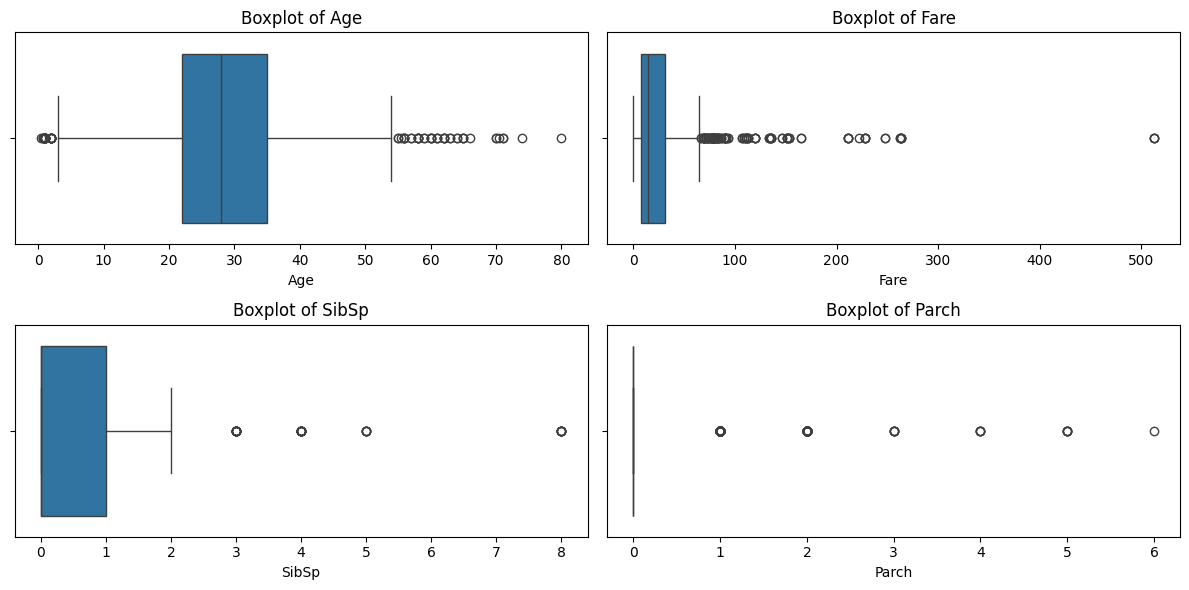

In [ ]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Identified Outliers
1. Age Column:

Maximum value: 80 years vs mean of ~29 years
The 75th percentile is 35, but max is 80, suggesting some very old passengers are outliers

2. Fare Column:

Maximum value: 512.33 vs mean of ~32.20
The 75th percentile is 31, but max is over 500, indicating extremely expensive tickets
This shows high positive skewness with some passengers paying exceptionally high fares

3. SibSp (Siblings/Spouses):

Maximum value: 8 vs mean of ~0.52
Most passengers (75th percentile) had 1 or fewer siblings/spouses, but some had up to 8

4. Parch (Parents/Children):

Maximum value: 6 vs mean of ~0.38
Similar pattern - most had 0-1, but some had up to 6

In [149]:
train_df['Fare_winsorized'] = train_df['Fare'].clip(upper=train_df['Fare'].quantile(0.95))
train_df['Age_winsorized'] = train_df['Age'].clip(upper=train_df['Age'].quantile(0.95))

In [ ]:
# For family size variables
train_df['SibSp_winsorized'] = train_df['SibSp'].clip(upper=train_df['SibSp'].quantile(0.95))
train_df['Parch_winsorized'] = train_df['Parch'].clip(upper=train_df['Parch'].quantile(0.95))

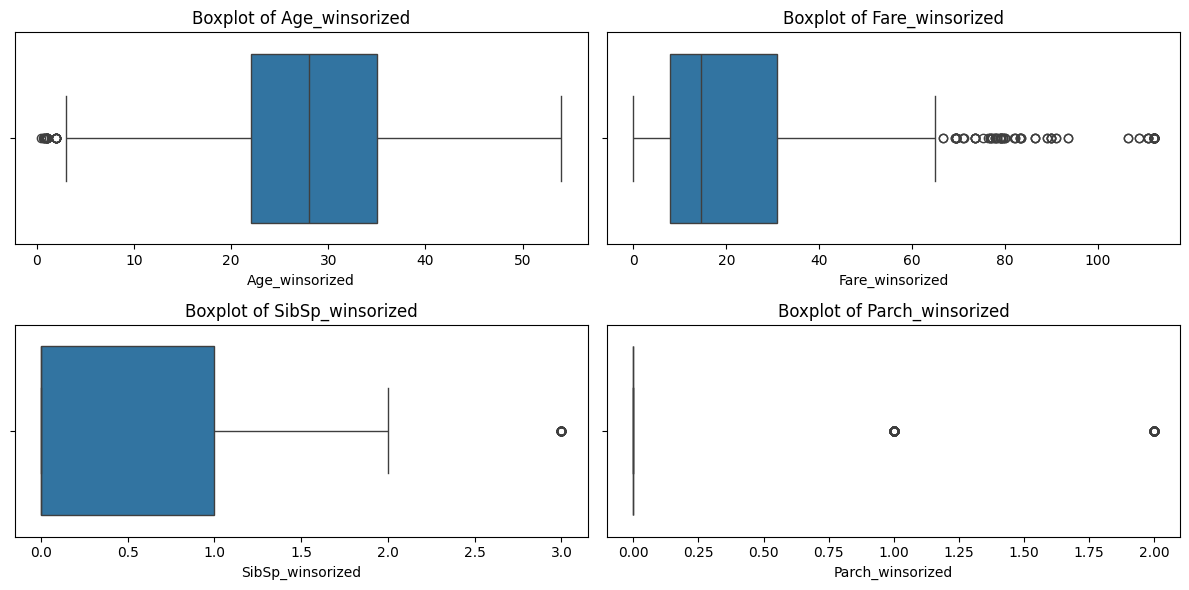

In [ ]:
numeric_cols = ['Age_winsorized', 'Fare_winsorized', 'SibSp_winsorized', 'Parch_winsorized']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_winsorized,Age_winsorized,SibSp_winsorized,Parch_winsorized
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,27.720486,28.984478,0.452301,0.345679
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,29.225083,12.093266,0.788059,0.663266
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,7.910400,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,14.454200,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,31.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,112.079150,54.000000,3.000000,2.000000


In [ ]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**Outlier Analysis**

**Fare Column:** Maximum value of 512.33 vs      mean of 32.20 (75th percentile: $31), showing extremely expensive tickets and high positive skewness

**Age Column:** Maximum of 80 years vs mean of 29 years (75th percentile: 35), indicating elderly passengers as outliers

**SibSp (Siblings/Spouses):** Maximum of 8 vs mean of 0.52, with most passengers having ≤1 but some with large families

**Parch (Parents/Children):** Maximum of 6 vs mean of 0.38, similar pattern with most having 0-1 family members

**Impact:** These outliers demonstrate positive skewness and could significantly affect statistical analysis. Winsorization treatment successfully addressed extreme values for improved modeling.

In [156]:
test_df['Fare_winsorized'] = test_df['Fare'].clip(upper=test_df['Fare'].quantile(0.95))
test_df['Age_winsorized'] = test_df['Age'].clip(upper=test_df['Age'].quantile(0.95))
test_df['SibSp_winsorized'] = test_df['SibSp'].clip(upper=test_df['SibSp'].quantile(0.95))
test_df['Parch_winsorized'] = test_df['Parch'].clip(upper=test_df['Parch'].quantile(0.95))

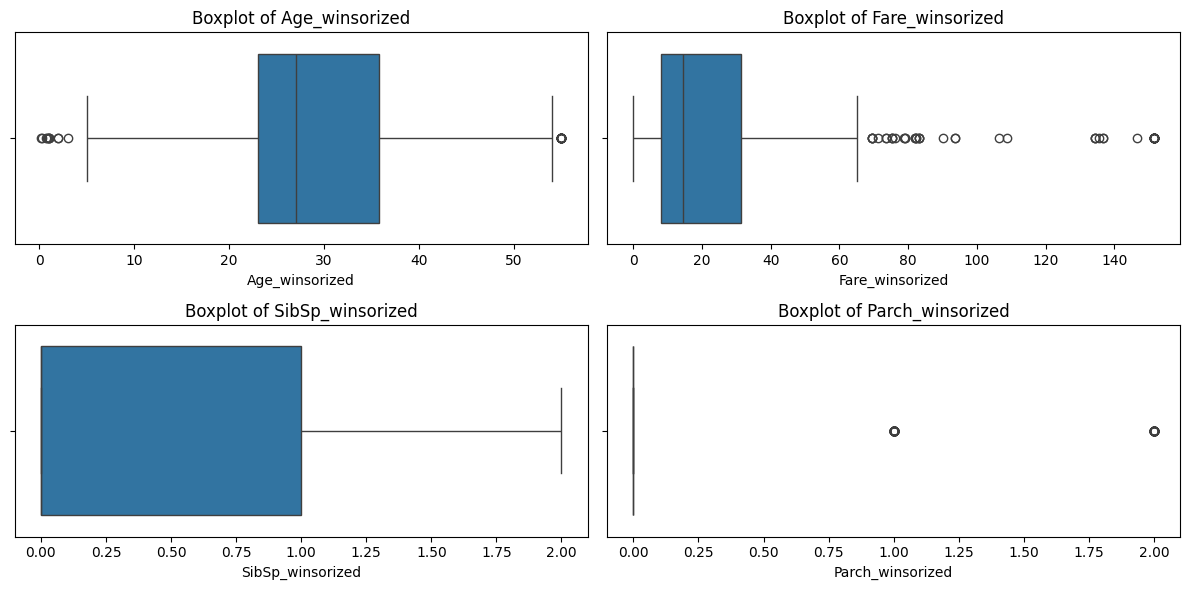

In [157]:
numeric_cols = ['Age_winsorized', 'Fare_winsorized', 'SibSp_winsorized', 'Parch_winsorized']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=test_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [158]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Fare_winsorized,Age_winsorized,SibSp_winsorized,Parch_winsorized
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535,31.158692,29.291866,0.382775,0.325359
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103,37.923834,11.946235,0.597268,0.649204
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,7.895800,23.000000,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,14.454200,27.000000,0.000000,0.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,31.471875,35.750000,1.000000,0.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,151.550000,55.000000,2.000000,2.000000
